In [1]:
'''
Import the modules that will be used
'''

import sys
import warnings
from distutils.version import LooseVersion

import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt

import network
import utils

%matplotlib inline

In [4]:
'''
Define the neural network that was used and define hyper-parameters.
These are needed to infer from the saved network checkpoint
'''

tf.reset_default_graph()

#cp_dir = '/home/cjw/disk2cjw/PythonLib/cjwdeeplearning/autoencoder/checkpoint-2018-03-19-11-19-18/'
cp_dir = '/home/cjw/disk2cjw/Data/cyto/Checkpoints/2018-04-11/checkpoint-2018-04-11-11-16-30/'
aemeta = 'autoencoder-64x-28020.meta'
#checkpoint-2018-03-02-16-31-42/'
width = 32
height = 32
nchannels = 1
channels = [0]
batchsize = 64
learning_rate = 0.0004

latent_size = 64
enc_sizes = [(64, 3), (128, 3), (256,3)] #, (512,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
dec_sizes = list(reversed(enc_sizes))
# enc_sizes = [(64, 5), (128, 3), (256,3), (512,3)]
# dec_sizes = list(reversed(enc_sizes))

images = tf.placeholder(tf.float32, (None, height, width, nchannels))
z = tf.placeholder(tf.float32, (None, latent_size))

enc = network.encoder(images, latent_size, droprate=.7, is_train=False,
                      nfilters=enc_sizes)
sdd = network.decoder(enc, nchannels=nchannels, width=width, droprate=.7,
                      is_train=False, nfilters=dec_sizes)

loss, _, _ = network.ae_loss(images, sdd)

opt = network.model_opt(loss, learning_rate)

saver = tf.train.Saver()

sess = tf.Session()
sess.run(tf.global_variables_initializer())
saver = tf.train.import_meta_graph(cp_dir + aemeta) #autoencoder-64x-18660.meta')
saver.restore(sess, tf.train.latest_checkpoint(cp_dir + ''))


Encoder False
[<tf.Tensor 'Placeholder:0' shape=(?, 32, 32, 1) dtype=float32>, <tf.Tensor 'Maximum:0' shape=(?, 16, 16, 64) dtype=float32>, <tf.Tensor 'Maximum_1:0' shape=(?, 8, 8, 128) dtype=float32>, <tf.Tensor 'Maximum_2:0' shape=(?, 4, 4, 256) dtype=float32>] Tensor("latent_space/BiasAdd:0", shape=(?, 64), dtype=float32)
isize:  4 32
[<tf.Tensor 'Maximum_3:0' shape=(?, 4096) dtype=float32>, <tf.Tensor 'Reshape:0' shape=(?, 4, 4, 256) dtype=float32>, <tf.Tensor 'Maximum_4:0' shape=(?, 8, 8, 128) dtype=float32>, <tf.Tensor 'Maximum_5:0' shape=(?, 16, 16, 64) dtype=float32>] Tensor("decoder_out/BiasAdd:0", shape=(?, 32, 32, 1), dtype=float32)
Tensor("Mean_1:0", shape=(), dtype=float32) Tensor("Mean_2:0", shape=(), dtype=float32) Tensor("add_5:0", shape=(), dtype=float32)
INFO:tensorflow:Restoring parameters from /home/cjw/disk2cjw/Data/cyto/Checkpoints/2018-04-11/checkpoint-2018-04-11-11-16-30/autoencoder-64x-28020


In [5]:
'''
Read in the data for the data table
'''

mm_name = "Fish6_CCB_16.tif.mm"
datadir = "/home/cjw/disk2cjw/Data/cyto/ChannelOne/"
# mmfilename = datadir + "Fish6_15_cjw_mean_zero.mm"
mmfilename = datadir + mm_name

mmheader = np.memmap(mmfilename, dtype="int32", mode='r',
                    shape=(4,))

header_shape = mmheader.shape
print(header_shape, mmheader)
xshape = [mmheader[0], mmheader[1], mmheader[2], mmheader[3]]
#xshape[0] = 2400
xshape = tuple(xshape)
del mmheader

n = xshape[0]
ids =  range(n)
# file = n*['Fish6_15_cjw_64.tif']
file = n*[mm_name[:-3]]
print(file[0])
fid = range(n)
# mmfile = n*['Fish6_15_cjw_64.tif.mm']
mmfile = n*[mm_name]
plate = n*[0]
row = n*[0]
column = n*[0]
field = n*[0]
yc = n*[32]
xc = n*[32]
well = n*[0]

df = pd.DataFrame({'id':ids, 'fid':fid, 'file':file, 'mmfile':mmfile, 'plate':plate,
                 'row':row, 'column':column, 'field':field,
                  'yc':yc, 'xc':xc, 'well':well})

df.head()

(4,) [10000    64    64     1]
Fish6_CCB_16.tif


,column,fid,field,file,id,mmfile,plate,row,well,xc,yc
0,0,0,0,Fish6_CCB_16.tif,0,Fish6_CCB_16.tif.mm,0,0,0,32,32
1,0,1,0,Fish6_CCB_16.tif,1,Fish6_CCB_16.tif.mm,0,0,0,32,32
2,0,2,0,Fish6_CCB_16.tif,2,Fish6_CCB_16.tif.mm,0,0,0,32,32
3,0,3,0,Fish6_CCB_16.tif,3,Fish6_CCB_16.tif.mm,0,0,0,32,32
4,0,4,0,Fish6_CCB_16.tif,4,Fish6_CCB_16.tif.mm,0,0,0,32,32


In [6]:
''' Read the memory map file'''

mf = df['mmfile']
umf = list(mf.unique())
print(umf)
#df = df.replace(umf, ["plate03_all.mm"])

m2 = np.memmap(mmfilename, dtype='float32', offset=128,
              mode='r', shape=xshape)

# mmdict = {"Fish_15_cjw_64.tif.mm": m2}
mmdict = {mm_name: m2}

['Fish6_CCB_16.tif.mm']


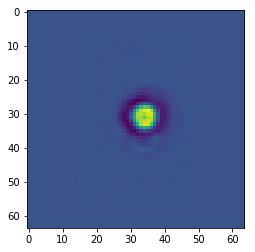

In [17]:
'''Just show a sample image to make sure everything is working'''

plt.imshow(m2[41,:,:,0])

10000
(10000, 128) (10000, 64, 64, 1)
-0.240300297737 1.32657456398
2077
1844
4284
33
4553


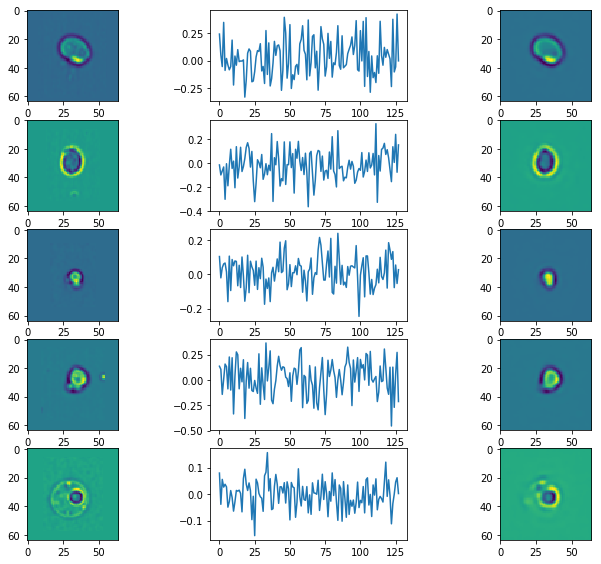

In [18]:
'''Read the images, display image, encode and show latent space, show decoded'''

vv = utils.getWell(mmdict,
                    df, width, 0, 0, nchannels, channels=channels)

print(len(vv))
xhe = sess.run(enc, feed_dict={images:vv})
xdd = sess.run(sdd, feed_dict={enc:xhe})
f = plt.figure(figsize=(12, 40))
print(xhe.shape, xdd.shape)
print(np.amin(vv),np.amax(vv))
for i in range(5):
    ix = np.random.randint(0, len(vv))
    print(ix)
    plt.subplot(20,3,i*3 + 1)
    plt.imshow(vv[ix,:,:,0])
    plt.subplot(20,3,i*3 + 2)
    plt.plot(xhe[ix])
    plt.subplot(20,3,i*3 + 3)
    plt.imshow(xdd[ix,:,:,0])
   

In [19]:
'''Encode the images with the trained network and store the latent spaces in an array'''

dv = {0:(0,0)}
dimages = dict()
counter = 0
one = 0
for k in dv.keys():
    i, j = dv[k]
    print(i, j)
    r = i + 1
    cm = j + 1
    try:
        k = vv #utils.getWell(mmdict,df, width, 0, 0, nchannels, channels=[0])
        print(len(k))
    except:
        print("Oh no!!")
        continue
    hek = sess.run(enc, feed_dict={images:k})
    dimages[counter] = k
    if one == 0:
        one = 1
        g = hek
        colors = np.zeros(k.shape[0])
        counter += 1
        print(i, j, g.shape, hek.shape)
    else:
        print(i, j, g.shape, hek.shape)
        g = np.concatenate((g,hek))
        colors = np.concatenate((colors, counter + np.zeros(k.shape[0])))
        counter += 1

g_all = g
g_all.shape

0 0
10000
0 0 (10000, 128) (10000, 128)


(10000, 128)

In [20]:
''' Create some colors for display later on'''

from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
clist = [(.2,.2,.2),
         (172/255,25/255,210/255),
         (255/255, 165./255, 0),
         (.5, .5, .5),
         (44/255,25/255,210/255),
         (134/255, 165./255, 56/255),
         (26/255,188/255,255/255),
         (188/255,255/255, 26/255)]

mycmap = LinearSegmentedColormap.from_list(
        'mycmap', clist, N=len(clist))

bounds = np.linspace(0, len(clist), len(clist) + 1)
norm = mpl.colors.BoundaryNorm(bounds, mycmap.N)
print(bounds, mycmap.N)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.] 8


In [21]:
'''Do PCA on the latent space features'''

from sklearn.decomposition import PCA
pca = PCA(n_components=32, svd_solver='arpack', whiten=True, copy=True)
gfit = pca.fit_transform(g_all)
print(gfit.shape)
print(pca.explained_variance_)
print(pca.components_.shape)


(10000, 32)
[ 0.24064013  0.14178364  0.10678969  0.09086775  0.0826676   0.0771557
  0.07112412  0.06797821  0.06175816  0.05877786  0.05751139  0.05305965
  0.0521894   0.0495107   0.04680389  0.04440739  0.04247243  0.03984883
  0.03908598  0.03769831  0.03586704  0.03563396  0.03462738  0.03215961
  0.03189616  0.03138673  0.02894947  0.02829877  0.02748486  0.02630029
  0.02558457  0.02540718]
(32, 128)


In [22]:
'''
Do clustering on the latent space features
find eight cluster for K-Means and Allomerative Clustering
'''

nclust = 8
from sklearn import cluster

km = cluster.KMeans(n_clusters=nclust).fit_predict(g_all)
agc = cluster.AgglomerativeClustering(n_clusters=nclust, affinity='euclidean', linkage="ward").fit_predict(g_all)


###  Show results of clustering using K-Means

Each row is a cluster found using the K-Means algorithm. The images are randomly selected from each cluster.
The image in the first column of every row is decoded from the average of the latent space features for each cluster.

0 705
1 482
2 1154
3 789
4 902
5 632
6 4836
7 500


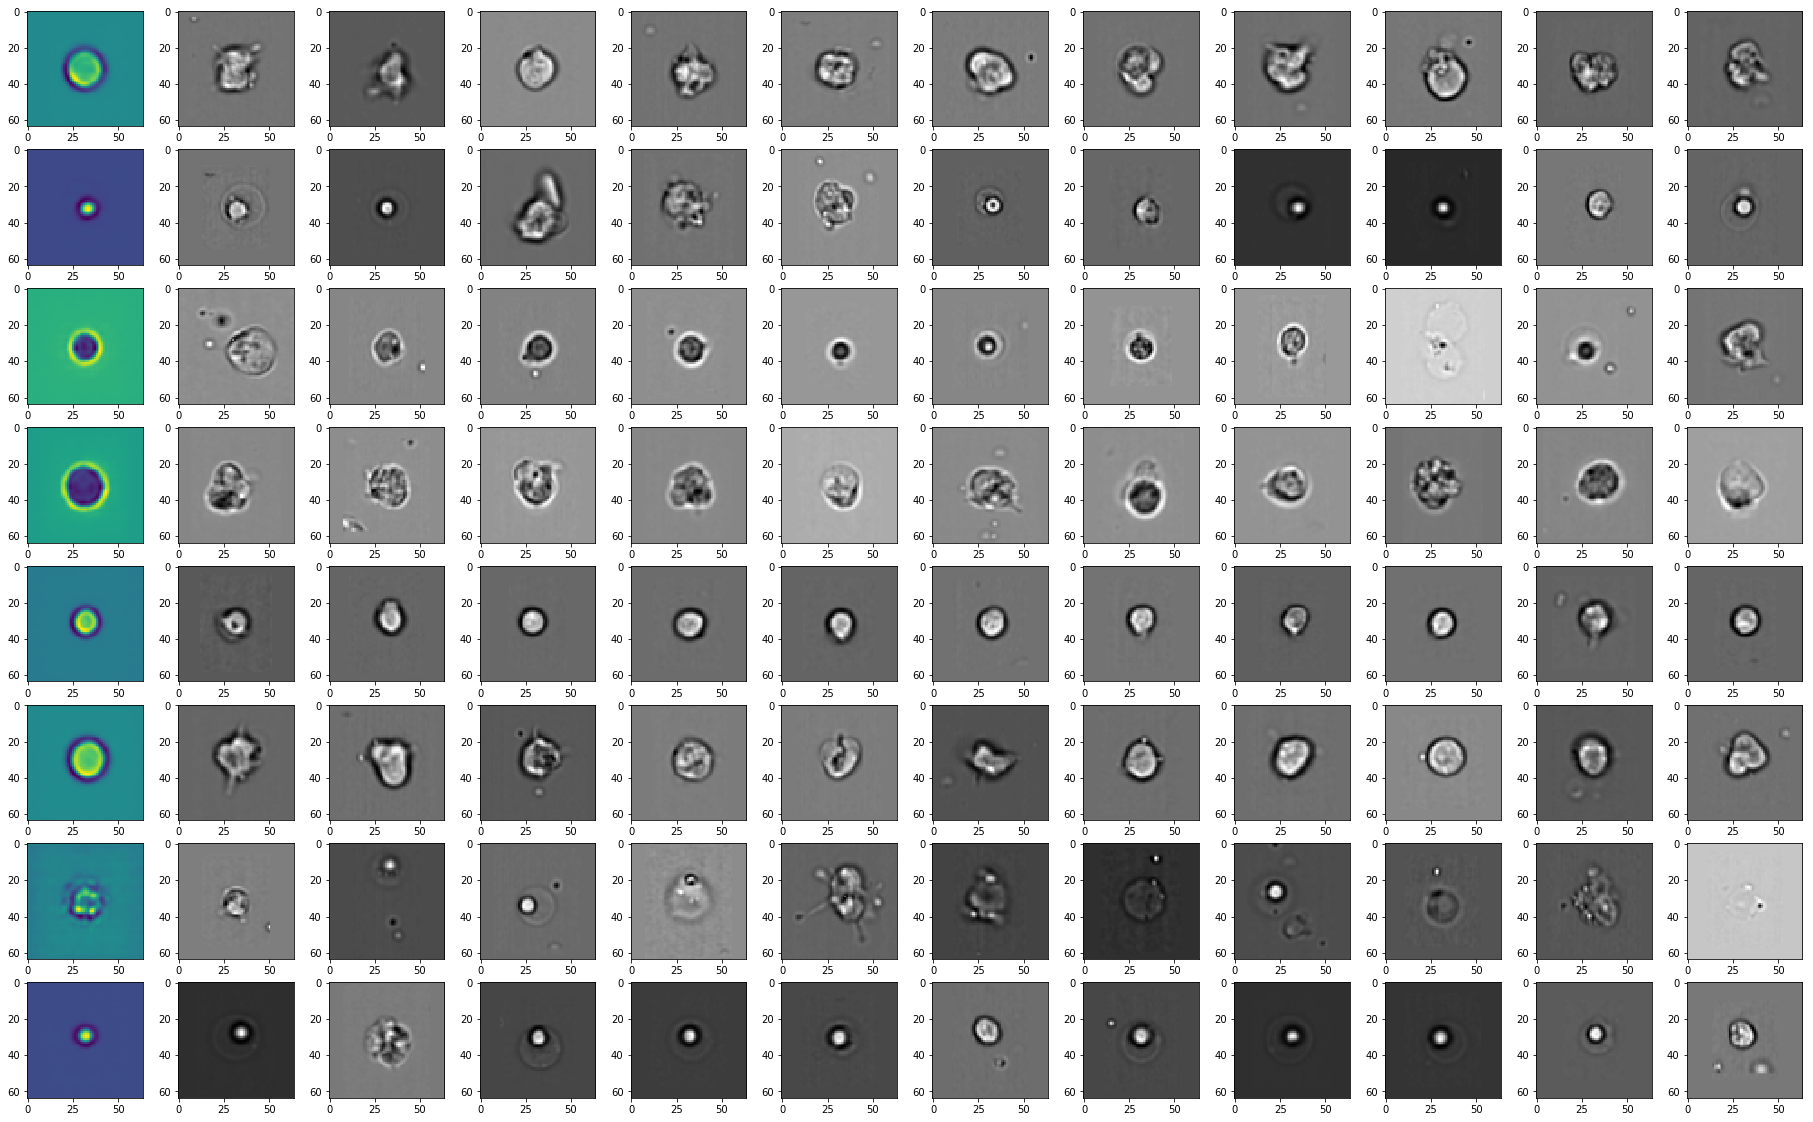

In [23]:
ximages = vv
ximages.shape

nk = nclust
plt.figure(figsize=(32, 2.5*nk))

counter = 1
shift = 0
for k in range(nk):
    row = ximages[km == k]

    print(k, row.shape[0])
    gk = g_all[km == k]
    gavk = np.mean(gk, axis=0)
    gavk = np.expand_dims(gavk.squeeze(), axis=0)
    resav = sess.run(sdd, feed_dict={enc:gavk})
    plt.subplot(nk, 12, counter)
    plt.imshow(resav.squeeze())
    counter += 1
    for i in range(11):
        plt.subplot(nk, 12, counter)
        counter += 1
        try:
            rnd = np.random.randint(0,len(row))
            plt.imshow(row[rnd,:,:,0], cmap='gray')
        except:
            plt.imshow(np.zeros((64,64)))

###  Show results of clustering using Agglomerative Clustering

Each row is a cluster found using the [Agglomerative Clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)
algorithm. The images are randomly selected from each cluster.
The image in the first column of every row is decoded from the average of the latent space features for each cluster.

0 2125
1 1077
2 1152
3 465
4 1122
5 582
6 199
7 3278


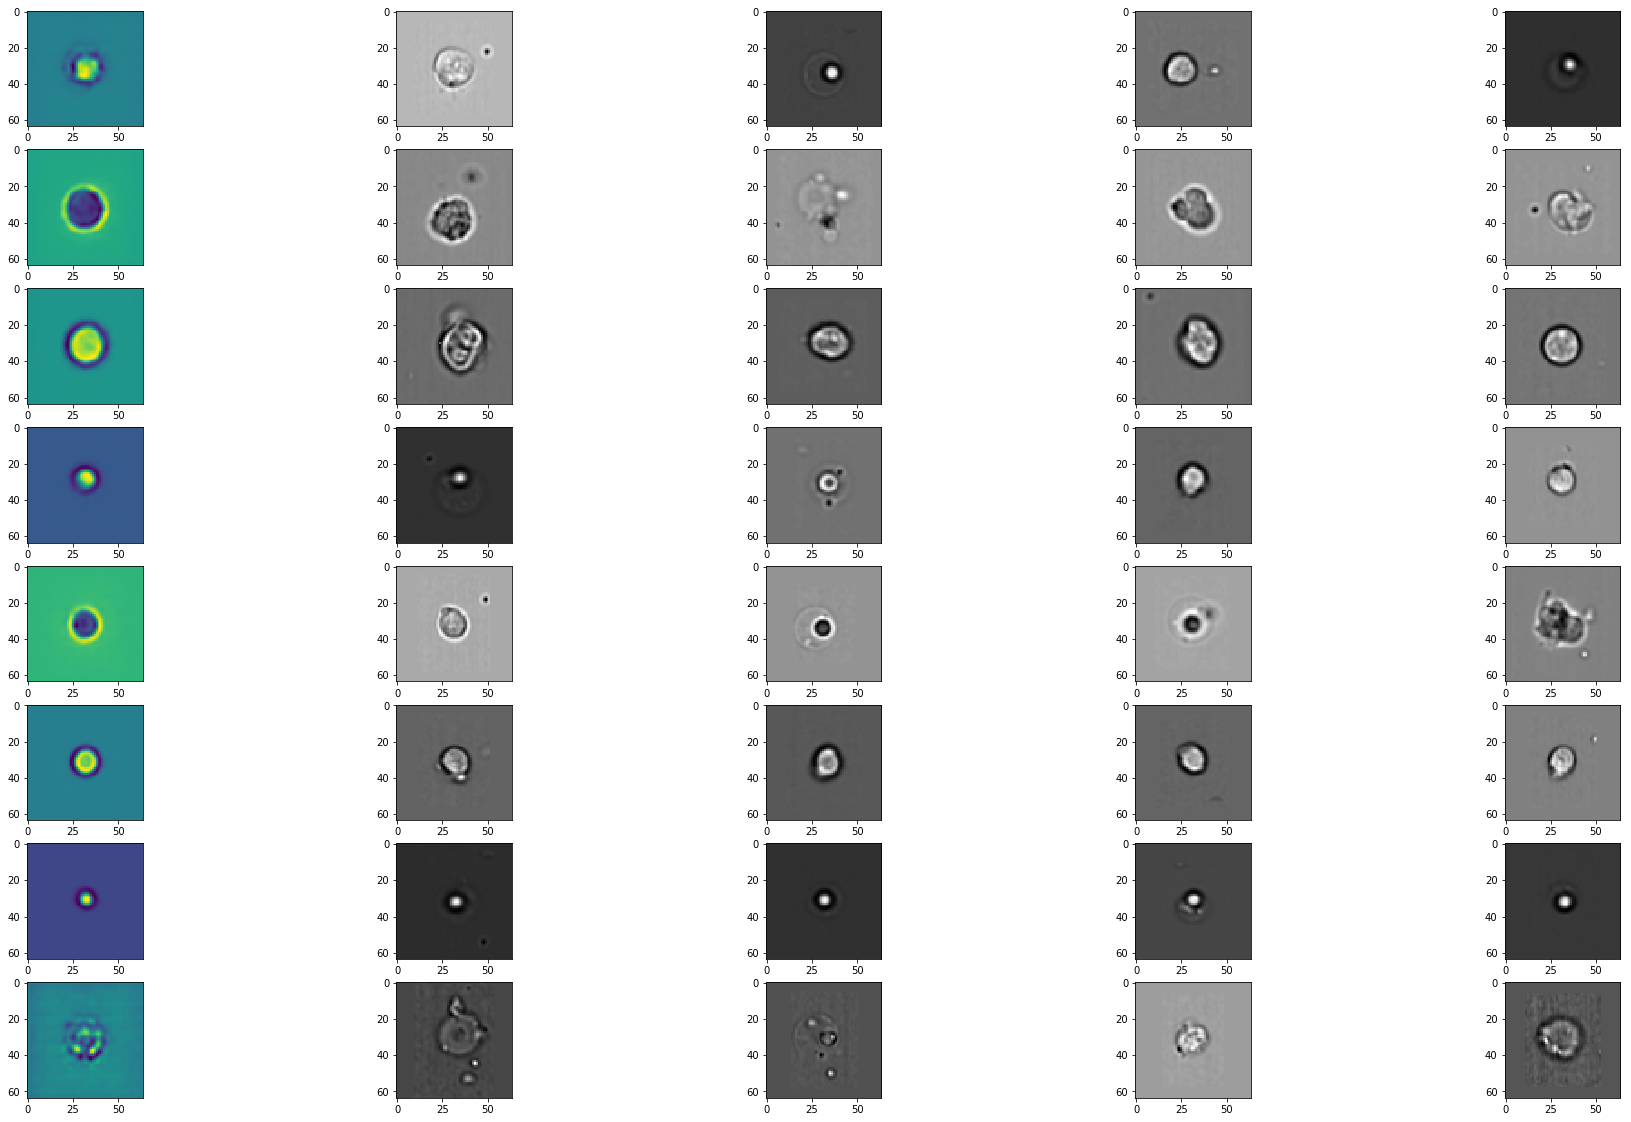

In [24]:
nk = nclust
plt.figure(figsize=(32, 2.5*nk))

counter = 1
shift = 0
for k in range(nk):
    row = ximages[agc == k]
    print(k, row.shape[0])
    gk = g_all[agc == k]
    gavk = np.mean(gk, axis=0)
    gavk = np.expand_dims(gavk.squeeze(), axis=0)
    resav = sess.run(sdd, feed_dict={enc:gavk})
    plt.subplot(nk, 5, counter)
    plt.imshow(resav.squeeze())
    counter += 1
    for i in range(4):
        plt.subplot(nk, 5, counter)
        counter += 1
        try:
            rnd = np.random.randint(0,len(row))
            plt.imshow(row[rnd,:,:,0], cmap='gray')
        except:
            plt.imshow(np.zeros((64,64)))

-------------------------------------------------------------------------

(1158, 64, 64, 1)


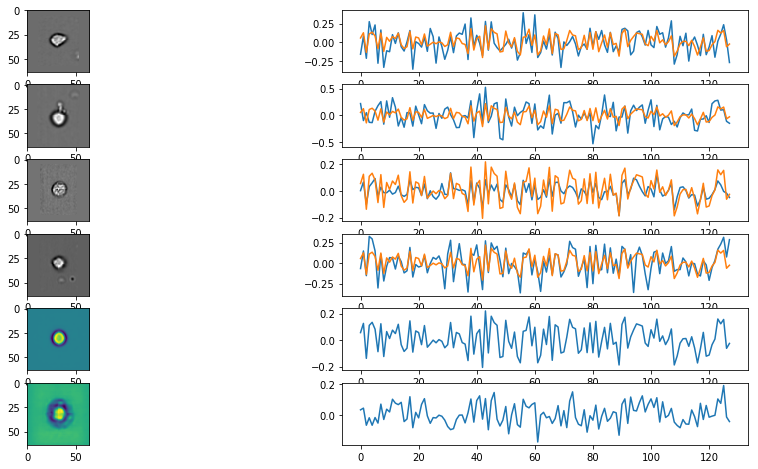

In [14]:
tn = 5
images4 = ximages[agc == tn]
g4 = g_all[agc == tn]
plt.figure(figsize=(16,8))
print(images4.shape)

gtest = np.mean(g4, axis=0)
gtest = np.expand_dims(gtest.squeeze(), axis=0)
res = sess.run(sdd, feed_dict={enc:gtest})

gav = np.mean(g_all, axis=0)
gav = np.expand_dims(gav.squeeze(), axis=0)
resav = sess.run(sdd, feed_dict={enc:gav})

ppi = 0
for i in range(4):
    ix = np.random.randint(0, len(g4))
    plt.subplot(6,2,i*2 + 1)
    plt.imshow(images4[ix,:,:,0], cmap='gray')
    plt.subplot(6,2, i*2 + 2)
    plt.plot(g4[ix,:])
    plt.plot(gtest.squeeze())
    ppi += 2

plt.subplot(6,2, ppi+ 1 )
plt.imshow(res.squeeze())
plt.subplot(6,2, ppi + 2)
plt.plot(gtest.squeeze())
plt.subplot(6,2, ppi + 3)
plt.imshow(resav.squeeze())
plt.subplot(6,2, ppi + 4)
plt.plot(gav.squeeze())


In [57]:
from sklearn.manifold import TSNE
gn = g_all[agc != 4]
print(gn.shape)
g_emb = TSNE(n_components=2,perplexity=30, learning_rate=500).fit_transform(gn.astype(np.float64))
print(g_emb.shape)



(7265, 128)
(7265, 2)


(10000,)
(7265,)
(10000,)


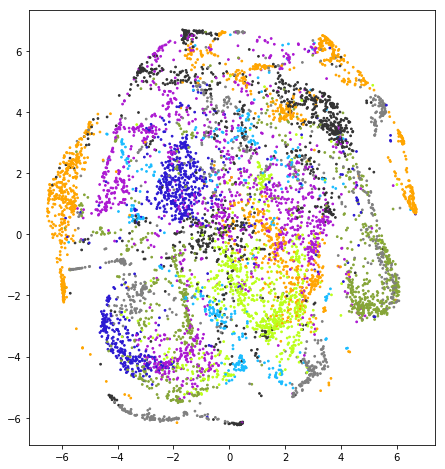

In [58]:
print(agc.shape)
print(agc[agc !=4].shape)
clist3 = clist*3
#cykm = [clist[z] for z in km[km !=4]]
cya = [clist3[z] for z in agc[agc != 4]]

print(colors.shape)
#from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16,8))
# plt.subplot(121)
# plt.scatter(g_emb[:,0], g_emb[:,1], s=3, c=cykm)
plt.subplot(122)
plt.scatter(g_emb[:,0], g_emb[:,1], s=3, c=cya)

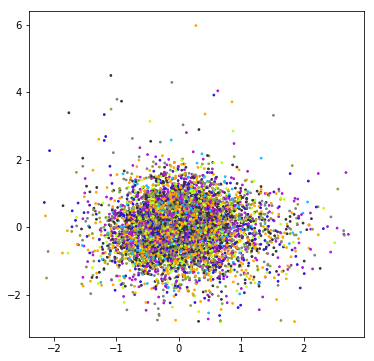

In [59]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
sc = ax.scatter(gfit[agc != 3][:,0], gfit[agc != 3][:,1], s=3, c=cya)

(753, 128) (753, 64, 64, 1)
0 97
1 109
2 158
3 9
4 130
5 35
6 125
7 90


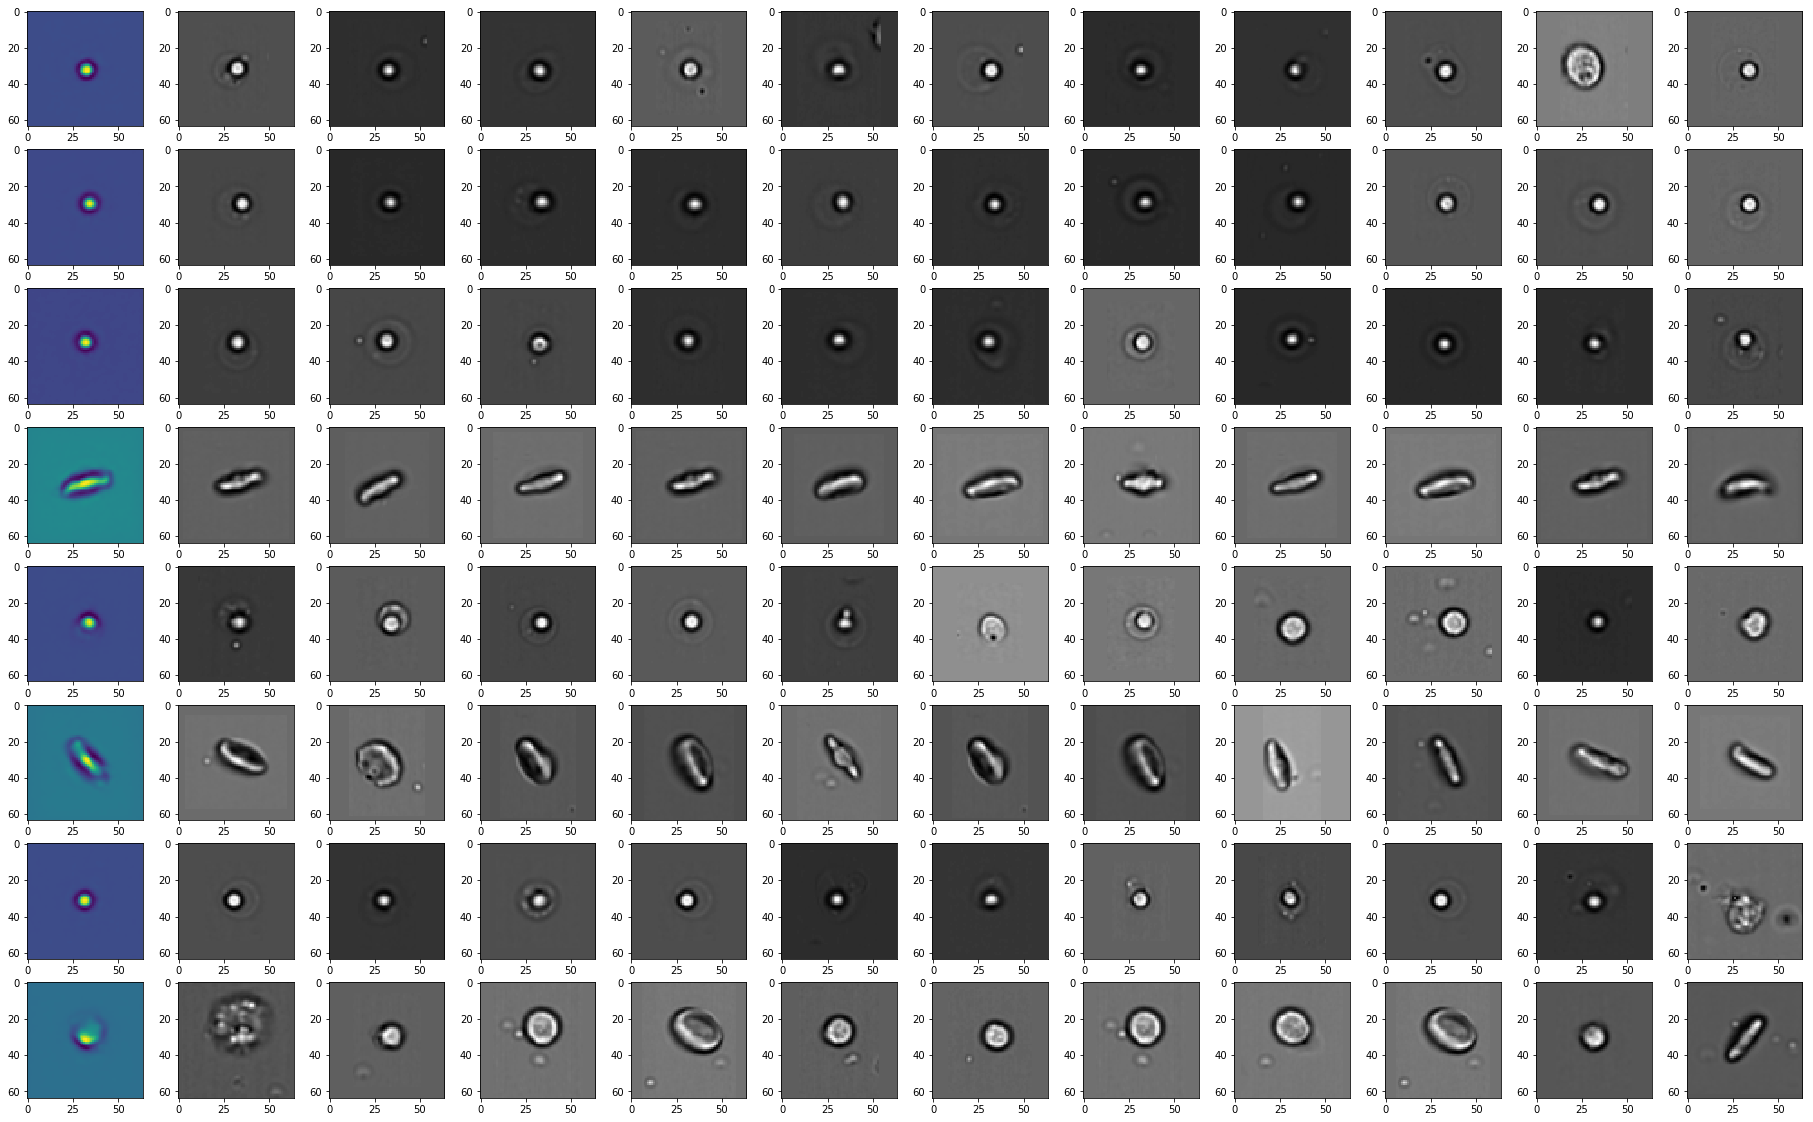

In [118]:
ain = 5
row4 = ximages[km == ain]
g4 = g_all[km == ain]
print(g4.shape, row4.shape)
agc4 = cluster.AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage="ward").fit_predict(g4)
agc4 = cluster.KMeans(n_clusters=8).fit_predict(g4)

nk = 8
plt.figure(figsize=(32, 2.5*nk))

counter = 1
shift = 0
for k in range(nk):
    row = row4[agc4 == k]
    print(k, row.shape[0])
    gk = g4[agc4 == k]
    gavk = np.mean(gk, axis=0)
    gavk = np.expand_dims(gavk.squeeze(), axis=0)
    resav = sess.run(sdd, feed_dict={enc:gavk})
    plt.subplot(nk, 12, counter)
    plt.imshow(resav.squeeze())
    counter += 1
    for i in range(11):
        plt.subplot(nk, 12, counter)
        counter += 1
        try:
            rnd = np.random.randint(0,len(row))
            plt.imshow(row[rnd,:,:,0], cmap='gray')
        except:
            plt.imshow(np.zeros((64,64)))

In [119]:
from sklearn.manifold import TSNE
g_emb4 = TSNE(n_components=2,perplexity=50, learning_rate=500).fit_transform(g4.astype(np.float64))



(10000,)


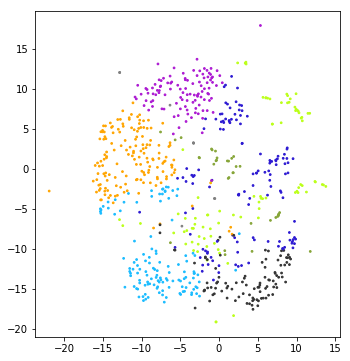

In [120]:
#cykm = [clist[z] for z in km]
cya4 = [clist[z] for z in agc4]

print(colors.shape)
#from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(g_emb4[:,0], g_emb4[:,1], s=3, c=cya4)
